#**Installing Tesseract**


In [1]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (31.1 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../tesseract

In [2]:
!tesseract -v

tesseract 4.0.0-beta.1
 leptonica-1.75.3
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0

 Found AVX2
 Found AVX
 Found SSE


#**Installing additional language packs, such as -tam**

In [3]:
!apt-get install tesseract-ocr-tam

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-tam
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,070 kB of archives.
After this operation, 3,253 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-tam all 4.00~git24-0e00fe6-1.2 [1,070 kB]
Fetched 1,070 kB in 1s (1,484 kB/s)
Selecting previously unselected package tesseract-ocr-tam.
(Reading database ... 155382 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-tam_4.00~git24-0e00fe6-1.2_all.deb ...
Unpacking tesseract-ocr-tam (4.00~git24-0e00fe6-1.2) ...
Setting up tesseract-ocr-tam (4.00~git24-0e00fe6-1.2) ...


In [4]:
!ls -ltr /usr/share/tesseract-ocr/4.00/tessdata/tam.traineddata

-rw-r--r-- 1 root root 3237963 Sep 15  2017 /usr/share/tesseract-ocr/4.00/tessdata/tam.traineddata


In [ ]:
!pip install fastwer

#**Importing required packages**

In [6]:
import fitz
import cv2
import matplotlib.pyplot as plt
import fastwer

#**Extract images using Fitz**

In [5]:
!pip install PyMuPDF

     |████████████████████████████████| 8.8 MB 12.8 MB/s 


In [9]:
fname = '01_Scan 1 (20 files merged).pdf'  
doc = fitz.open(fname)
for i in range(len(doc)):
    imglist = doc.getPageImageList(i)
    for img in imglist:
        xref = img[0]                 
        pix = fitz.Pixmap(doc, xref)   
        if pix.n - pix.alpha < 5:      
            pix.writePNG("p-%s.png" % (xref))
        else:                          
            pix0 = fitz.Pixmap(fitz.csRGB, pix)
            pix0.writePNG("p-%s.png" % (xref))
            pix0 = None           

Deprecation: 'getPageImageList' removed from class 'Document' after v1.19 - use 'get_page_images'.
Deprecation: 'writePNG' removed from class 'Pixmap' after v1.19 - use 'save'.


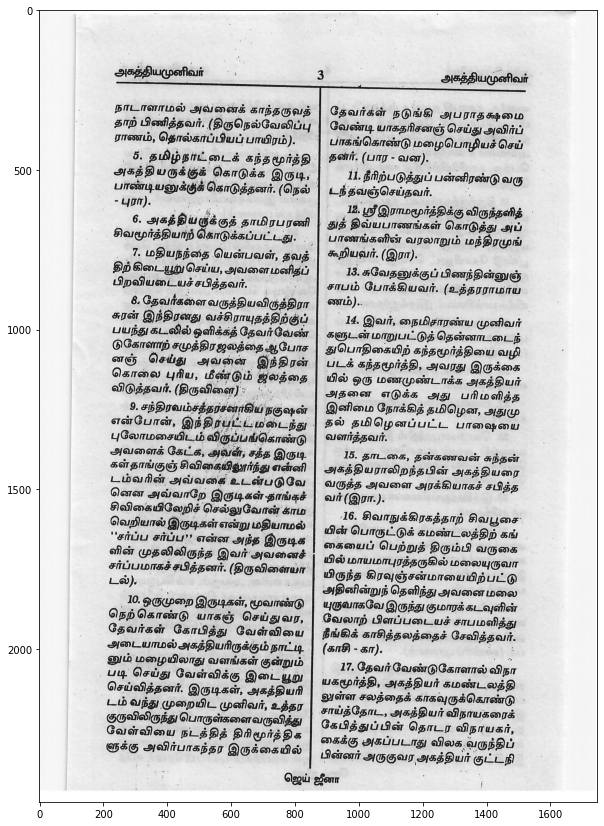

In [10]:
pagename = 'p-44'
image = cv2.imread(pagename+'.png')
plt.figure(figsize=(10,15))
plt.imshow(image, cmap='gray')

#**OCRing the Text from the image**

In [28]:
!tesseract {pagename}.png {pagename} -l tam --psm 1 

Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica


In [29]:
!cat {pagename}.txt

 

நாடாளாமல்‌ அவனைக்‌ காந்தருவத்‌

தாற்‌ பிணித்தவர்‌. (திருநெல்வேலிப்பு

ராணம்‌, தொல்காப்பியப்‌ பாயிரம்‌).

_5: தமிழ்நாட்டைக்‌ கந்தமூர்த்தி.
அகத்தியருக்குக்‌ கொடுக்க இருடி, .
பாண்டியனுக்குச்‌ கொடுத்தனர்‌. ( நெல்‌

- பூரா.

ம்‌ அகத்தியருக்குத்‌ தாமிரபரணி
சிவமூர்த்தியாற்‌ கொடுக்கப்பட்டது. .

7. மதியநந்தை .யென்பவள்‌, தவத்‌.

இற்‌ கிடையூறு செய்ய, அவளைமனிதப்‌

பிறவியடையச்சபித்தவர்‌.

4. தேவர்களை வருத்தியவிருத்திரா
சுரன்‌ இந்திரனது வச்சிராயுதத்திற்குப்‌
பயந்து கடலில்‌ ஒளிக்கத்‌ தேவர்வேண்‌
டுகோளாற்‌ சமுத்திர ஜலத்தை ஆபோச
னஞ்‌ செய்து அவனை. இந்திரன்‌
கொலை புரிய, மீண்டும்‌ ஜலத்தை
விடுத்தவர்‌. (திருவிளை): :...

9. சந்திரவம்சத்தரசனாகிய நகுஷன்‌
என்போன்‌, இந்திர; 2
புலோமசையிடம்‌ விருப்பங்கொண்டு
அவளைக்‌ கேட்க, அவள்‌, சத்த இருடி
கள்தாங்குஞ்‌ சிவிகையிலூர்ந்து என்னி
டம்வரின்‌ அவ்வகை உடன்படுவே
னென அவ்வாறே இருடிகள்‌-தாங்கச்‌
சிவிகையிலேறிச்‌ செல்லுவோன்‌ காம
வெறியால்‌ இருடிகள்‌ என்று மதியாமல்‌
"சர்ப்ப சர்ப்ப? என்ன அந்த இருடிக
வின்‌ முதலிலிருந்த இவர்‌: அவனைச்‌

 

சர்ப்பமாகச்சபித்தனர்‌. (இருவிளையா'

டல்‌).
10

#**Cleaning the Recognised OCR Text**

In [107]:
with open('Tamil.txt', 'r') as file1:
    ref = file1.read().rstrip()

with open('p-44.txt', 'r') as file2:
    out = file2.read().rstrip()
ref = ref.replace("\n", "")
ref = ref.replace("\'", "")

out = out.replace("\n", "")
out = out.replace("\u200c", "")
out = out.replace("\'", "")
out = out.replace("_", "")
out = out.replace(":", "")
#out = out.replace("ஜெய் ஜீனா", "") 

In [103]:
ref

'நாடாளாமல் அவனைக் காந்தருவத் தாற் பிணித்தவர். (திருநெல்வேலிப்பு ராணம், தொல்காப்பியப் பாயிரம்).5. தமிழ்நாட்டைக் கந்தமூர்த்தி அகத்தியருக்குக் கொடுக்க இருடி, பாண்டியனுக்குக் கொடுத்தனர். (நெல் -புரா).6. அகத்தியருக்குத் தாமிரபரணி சிவமூர்த்தியாற் கொடுக்கப்பட்டது.7. மதியநந்தை யென்பவள், தவத் திற்கிடையூறு செய்ய, அவளை மனிதப் பிறவியடையச் சபித்தவர். 8.தேவர்களை வருத்தியவிருத்திரா சுரன் இந்திரனது வச்சிராயுதத்திற்குப் பயந்து கடலில் ஒளிக்கத் தேவர்வேண் டுகோளாற் சமுத்திரஜலத்தை ஆபோச னஞ் செய்து அவனை இந்திரன் கொலை புரிய, மீண்டும் விடுத்தவர்.(திருவிளை)9.சந்திரவம்சத்தரசனாகிய நகுஷன் என்போன், இந்திரபட்டமடைந்து புலோமசையிடம் விருப்பங்கொண்டு அவளைக் கேட்க, அவள், சத்த இருடி கள்தாங்குஞ் சிவிகையிலூர்ந்து என்னி டம்வரின் அவ்வகை உடன்படுவே னென அவ்வாறே இருடிகள் தாங்கச் சிவிகையிலேறிச் செல்லுவோன் காம வெறியால் இருடிகள் என்று மதியாமல் "சர்ப்ப சர்ப்ப" என்ன அந்த இருடிகளின் முதலிலிருந்த இவர் அவனைச் சர்ப்பமாகச் சபித்தனர். (திருவிளையாடல்).10.ஒருமுறை இருடிகள்,மூவாண்டு நெற்கொண்டு யாகஞ் செய்துவர, தேவர்கள் கோபித்து வேள்வியை அடையாமல் அ

In [108]:
out

' நாடாளாமல் அவனைக் காந்தருவத்தாற் பிணித்தவர். (திருநெல்வேலிப்புராணம், தொல்காப்பியப் பாயிரம்).5 தமிழ்நாட்டைக் கந்தமூர்த்தி.அகத்தியருக்குக் கொடுக்க இருடி, .பாண்டியனுக்குச் கொடுத்தனர். ( நெல்- பூரா.ம் அகத்தியருக்குத் தாமிரபரணிசிவமூர்த்தியாற் கொடுக்கப்பட்டது. .7. மதியநந்தை .யென்பவள், தவத்.இற் கிடையூறு செய்ய, அவளைமனிதப்பிறவியடையச்சபித்தவர்.4. தேவர்களை வருத்தியவிருத்திராசுரன் இந்திரனது வச்சிராயுதத்திற்குப்பயந்து கடலில் ஒளிக்கத் தேவர்வேண்டுகோளாற் சமுத்திர ஜலத்தை ஆபோசனஞ் செய்து அவனை. இந்திரன்கொலை புரிய, மீண்டும் ஜலத்தைவிடுத்தவர். (திருவிளை) ...9. சந்திரவம்சத்தரசனாகிய நகுஷன்என்போன், இந்திர; 2புலோமசையிடம் விருப்பங்கொண்டுஅவளைக் கேட்க, அவள், சத்த இருடிகள்தாங்குஞ் சிவிகையிலூர்ந்து என்னிடம்வரின் அவ்வகை உடன்படுவேனென அவ்வாறே இருடிகள்-தாங்கச்சிவிகையிலேறிச் செல்லுவோன் காமவெறியால் இருடிகள் என்று மதியாமல்"சர்ப்ப சர்ப்ப? என்ன அந்த இருடிகவின் முதலிலிருந்த இவர் அவனைச் சர்ப்பமாகச்சபித்தனர். (இருவிளையாடல்).10. ஒருமுறை இருடிகள், மூவாண்டுநெற் கொண்டு யாகஞ் செய்துவர,தேவர்கள் கோபித்து வேள்வியைஅடையாமல்அகத்தியரிருக்க

#**Evaluation Metrics**

In [110]:
fastwer.score_sent(out, ref, char_level=True)
#fastwer.score_sent(out, ref)

4.3393

In [ ]:
!pip install Levenshtein

In [114]:
from Levenshtein import distance
print(distance(ref, out))

190
